In [52]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Load data from CSV file
df = pd.read_csv('winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


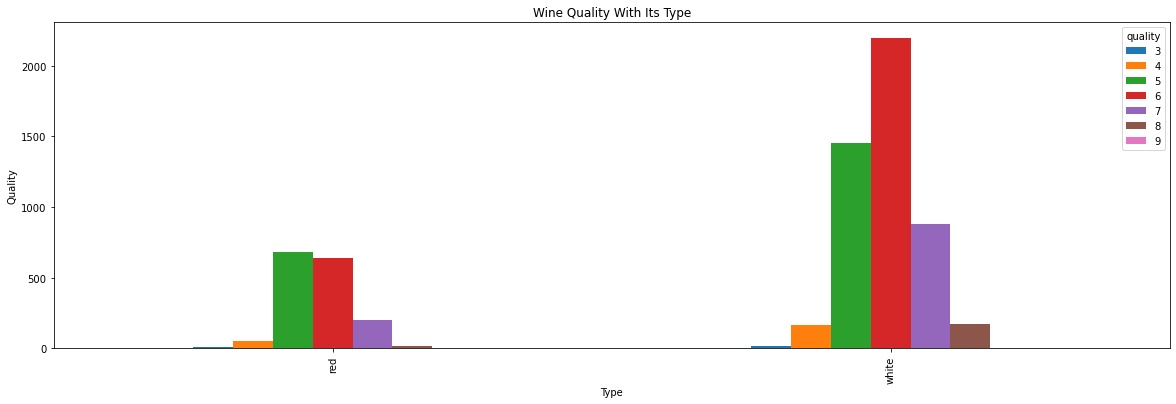

In [53]:
pd.crosstab(df.type,df.quality).plot(kind="bar",figsize=(20,6))
plt.title("Wine Quality With Its Type")
plt.ylabel("Quality")
plt.xlabel("Type")
plt.show()

In [54]:
mean = df["fixed acidity"].mean()
df["fixed acidity"].fillna(mean, inplace = True)


mean2 = df["volatile acidity"].mean()
df["volatile acidity"].fillna(mean, inplace = True)


mean3 = df["citric acid"].mean()
df["citric acid"].fillna(mean,inplace=True)


mean4 = df["residual sugar"].mean()
df["residual sugar"].fillna(mean,inplace=True)


mean5 = df["chlorides"].mean()
df["chlorides"].fillna(mean,inplace=True)


mean6 = df["pH"].mean()
df["pH"].fillna(mean,inplace=True)


mean7 = df["sulphates"].mean()
df["sulphates"].fillna(mean,inplace=True)

In [62]:

X = df[['fixed acidity',"volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]]
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


dtc = DecisionTreeClassifier(max_depth=13)



grid = dict()
grid['n_estimators'] = [100, 500, 140]
grid['learning_rate'] = [ 0.01, 0.1, 1.0,.2]

grid_search = GridSearchCV(estimator=AdaBoostClassifier(base_estimator=dtc), param_grid=grid, n_jobs=-1, scoring='neg_mean_squared_error')

grid_result = grid_search.fit(X, y)


print("Best: %f using %s" % (-1*grid_result.best_score_, grid_result.best_params_))


means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



Best: 0.706193 using {'learning_rate': 1.0, 'n_estimators': 140}
-0.847944 (0.134110) with: {'learning_rate': 0.01, 'n_estimators': 100}
-0.786218 (0.170868) with: {'learning_rate': 0.01, 'n_estimators': 500}
-0.807931 (0.113679) with: {'learning_rate': 0.01, 'n_estimators': 140}
-0.751293 (0.175611) with: {'learning_rate': 0.1, 'n_estimators': 100}
-0.730205 (0.188153) with: {'learning_rate': 0.1, 'n_estimators': 500}
-0.720197 (0.185922) with: {'learning_rate': 0.1, 'n_estimators': 140}
-0.711114 (0.173425) with: {'learning_rate': 1.0, 'n_estimators': 100}
-0.711425 (0.185355) with: {'learning_rate': 1.0, 'n_estimators': 500}
-0.706193 (0.185007) with: {'learning_rate': 1.0, 'n_estimators': 140}
-0.722510 (0.185487) with: {'learning_rate': 0.2, 'n_estimators': 100}
-0.718809 (0.182455) with: {'learning_rate': 0.2, 'n_estimators': 500}
-0.729895 (0.182602) with: {'learning_rate': 0.2, 'n_estimators': 140}


In [60]:
abc = AdaBoostClassifier(base_estimator=dtc, n_estimators=500, learning_rate=.001)


abc.fit(X_train, y_train)


y_pred = abc.predict(X_test)


accuracy = mean_squared_error(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5041666666666667


In [23]:
df2 = df[df['type'].str.contains('white')]
X = df2[['fixed acidity',"volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]]
y = df2['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


dtc = DecisionTreeClassifier(max_depth=1)


abc = AdaBoostClassifier(base_estimator=dtc, n_estimators=50, learning_rate=1)


abc.fit(X_train, y_train)


y_pred = abc.predict(X_test)


accuracy = mean_squared_error(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4326530612244898


In [58]:
df3 = df[df['type'].str.contains('red')]
df3.head()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4898,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
4899,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
4900,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4901,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4902,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [59]:
X = df3[['fixed acidity',"volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]]
y = df3['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


dtc = DecisionTreeClassifier(max_depth=1)


abc = AdaBoostClassifier(base_estimator=dtc, n_estimators=50, learning_rate=1)


abc.fit(X_train, y_train)


y_pred = abc.predict(X_test)


accuracy = mean_squared_error(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5916666666666667
